In [27]:
# Import all of the library 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Heart Disease

## Attribute Information: 
- 1. #3 (age)  
- 2. #4 (sex)  
- 3. #9 (cp) cp: chest pain type  
   -- Value 1: typical angina  
   -- Value 2: atypical angina  
   -- Value 3: non-anginal pain  
   -- Value 4: asymptomatic 
- 4. #10 (trestbps) trestbps: resting blood pressure (in mm Hg on admission to the hospital)  
- 5. #12 (chol) chol: serum cholestoral in mg/dl 
- 6. #16 (fbs) fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
- 7. #19 (restecg) restecg: resting electrocardiographic results 
- 8. #32 (thalach) halach: maximum heart rate achieved 
- 9. #38 (exang) exercise induced angina (1 = yes; 0 = no) 
- 10. #40 (oldpeak) oldpeak = ST depression induced by exercise relative to rest 
- 11. #41 (slope) slope: the slope of the peak exercise ST segment 
   -- Value 1: upsloping  
   -- Value 2: flat  
   -- Value 3: downsloping 
- 12. #44 (ca) ca: number of major vessels (0-3) colored by flourosopy 
- 13. #51 (thal) thaldur: duration of exercise test in minutes 
- 14. #58 (num) (the predicted attribute) num: diagnosis of heart disease (angiographic disease status)  
     -- Value 0: < 50% diameter narrowing  
     -- Value 1: > 50% diameter narrowing  (in any major vessel: attributes 59 through 68 are vessels)


In [4]:
# import the data and see the basic description
# df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")
# df.columns = ["age", "sex", "cp", "trestbps", "chol","fbs", "restecg","thalach","exang", "oldpeak","slope", "ca", "thal", "num"]

df = pd.read_csv("../../data/heart.cleveland.csv")

print("---- Describe ----")
print(df.describe())
print('---- Info -----')
print(df.info())
print('---- Dtype ----')
print(df.dtypes)
print('---- Null Data ----')
print(df.isnull().sum())

---- Describe ----
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope         num  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.

In [5]:
# Replace Every Number greater than 0 to 1 to mark heart disease
df.loc[df['num'] > 0 , 'num'] = 1
df.ca = pd.to_numeric(df.ca,errors='coerce').fillna(0)
df.thal = pd.to_numeric(df.thal,errors='coerce').fillna(0)
print(df.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object


In [6]:
# print the first 10 and last 10
print('------ First 10 -------')
df.head()

------ First 10 -------


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [100]:
#  Last 10 
print('------ Last 10 -------')
df.tail()

------ Last 10 -------


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



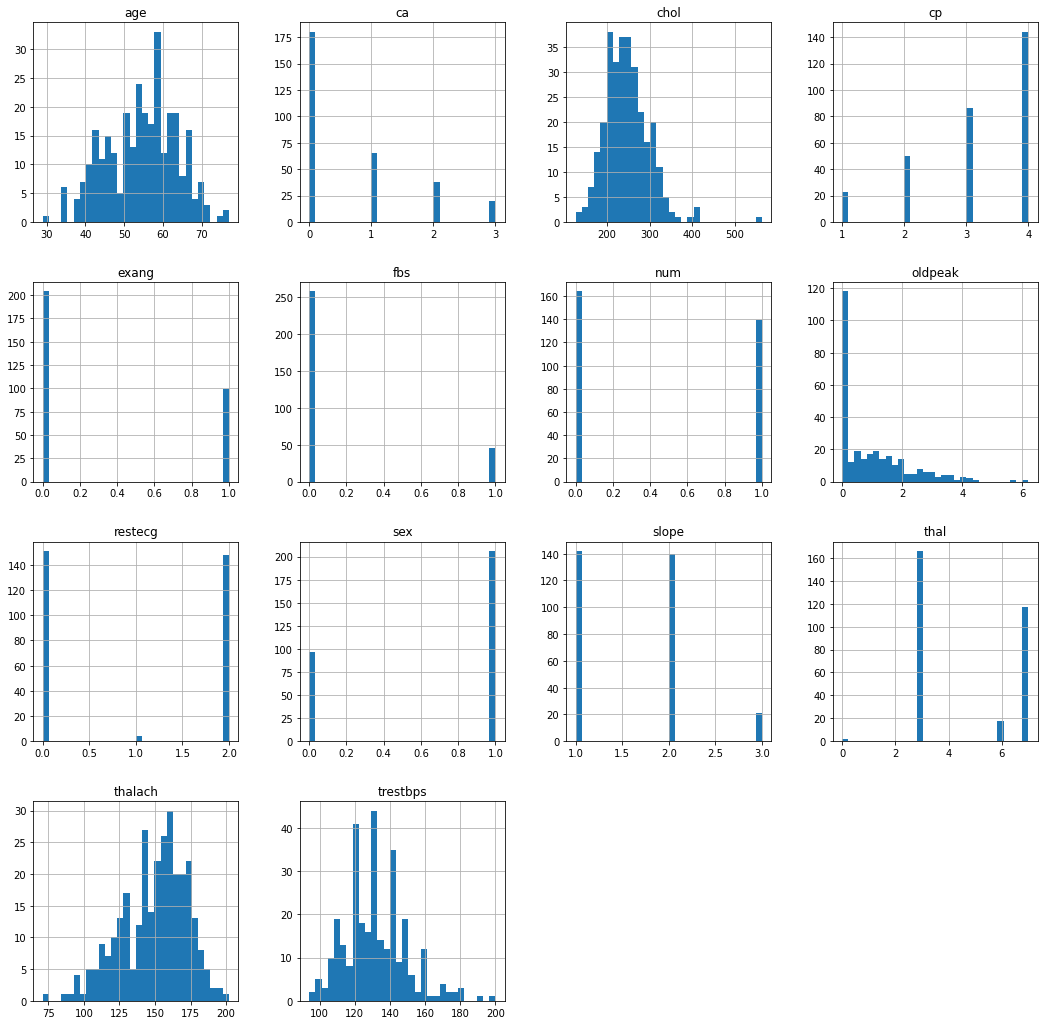

In [7]:
# get the histogram of every data points
fig = plt.figure(figsize = (18,18))
ax = fig.gca()
df.hist(ax=ax,bins=30)
plt.show()

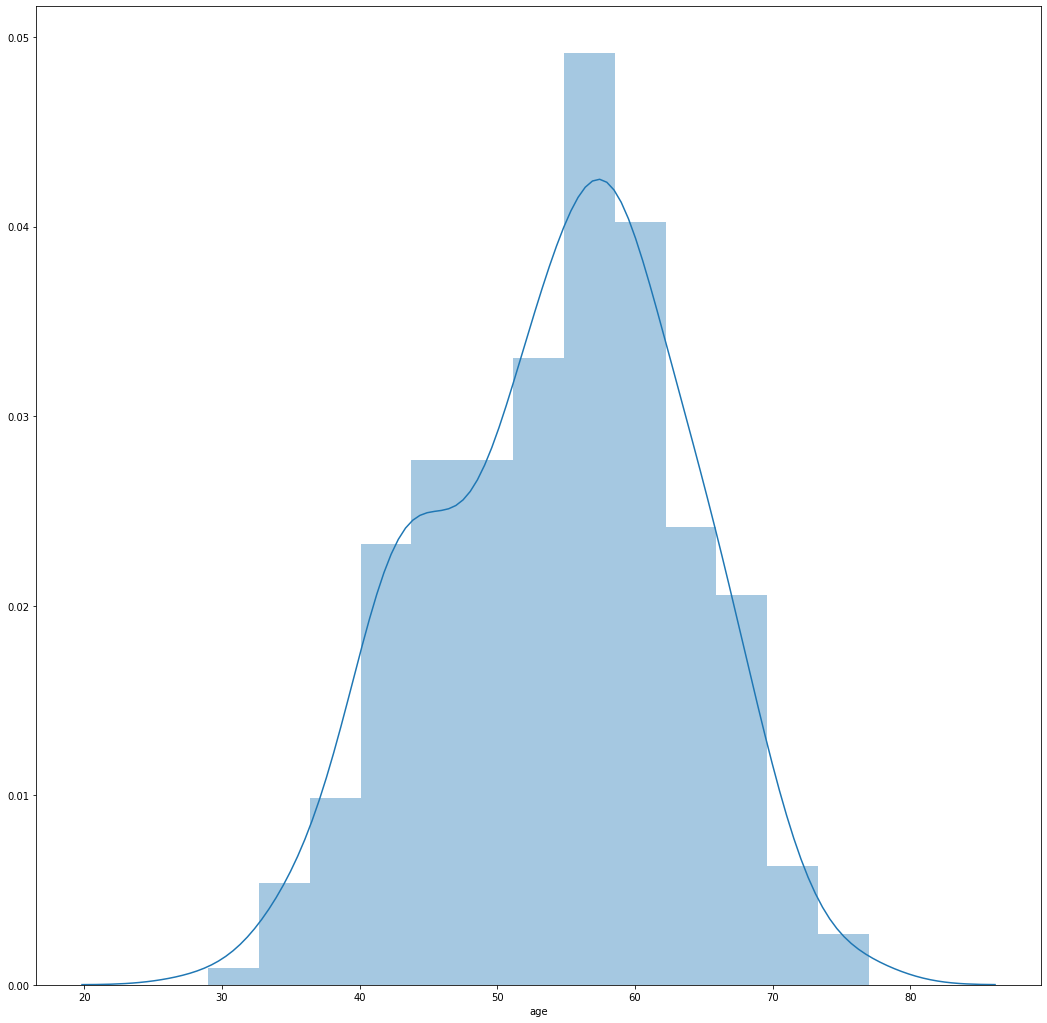

In [8]:
# more closer look at age
plt.figure(figsize=(18,18))
sns.distplot(df.age)
plt.show()

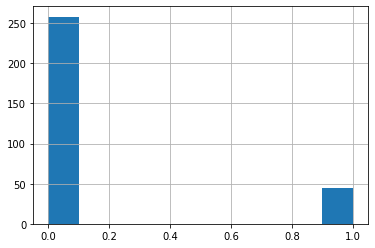

In [14]:
df.fbs.hist()

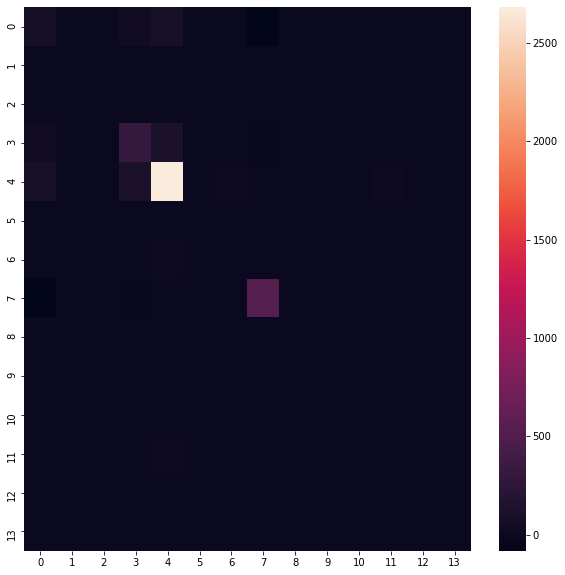

In [20]:
from numpy import dot
# calculate the Variance-Covariance Matrix 
sample = df.values
sample = sample - dot(np.ones((sample.shape[0],sample.shape[0])),sample)/(len(sample)-1)
covv = dot(sample.T,sample)/(len(sample)-1)
plt.figure(figsize=(10,10))
sns.heatmap(covv)
plt.show()

<IPython.core.display.Javascript object>


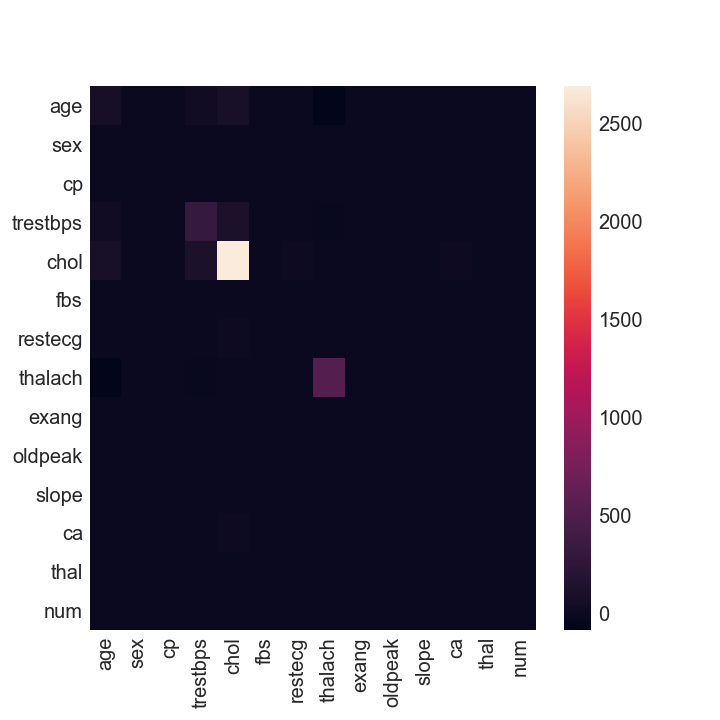

In [349]:
# compare with built in 
plt.figure(figsize=(10,10))
sns.heatmap(df.cov())
plt.show()

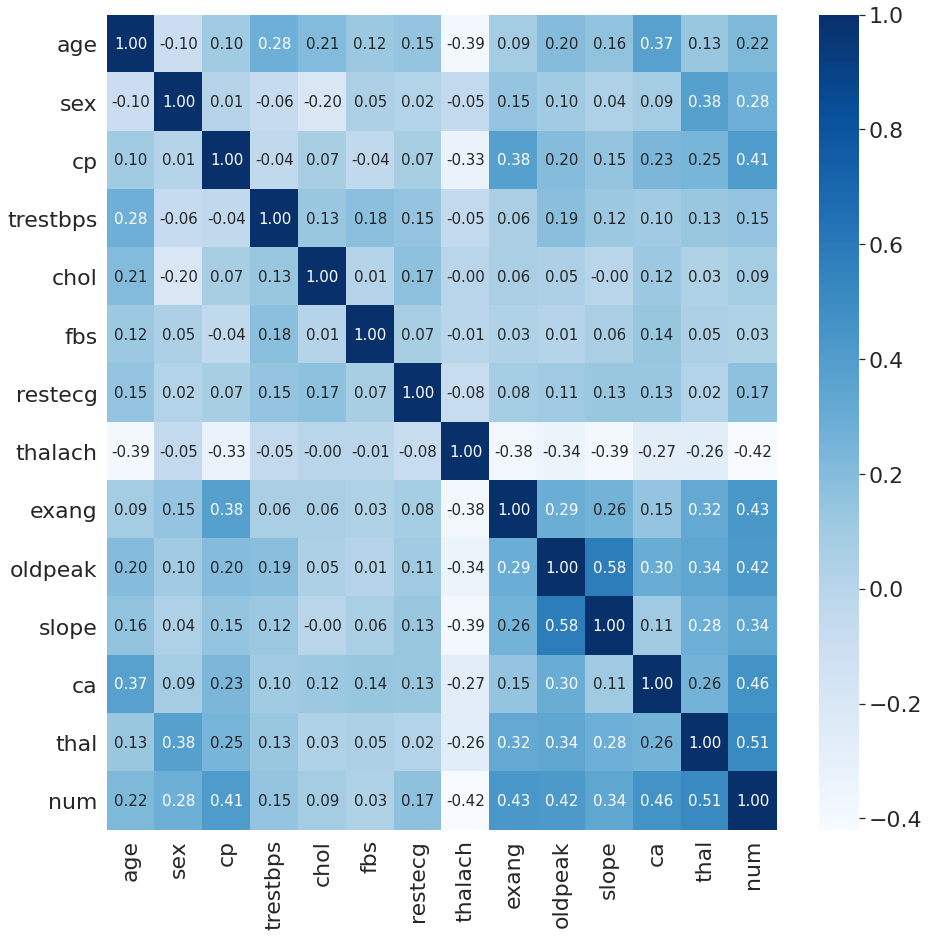

In [23]:
# correaltion matrix 
sns.set(font_scale=2)
plt.figure(figsize=(15,15))
sns.heatmap(df.corr().round(2),annot=True,fmt=".2f",cmap="Blues",annot_kws={"size": 15})
plt.show()

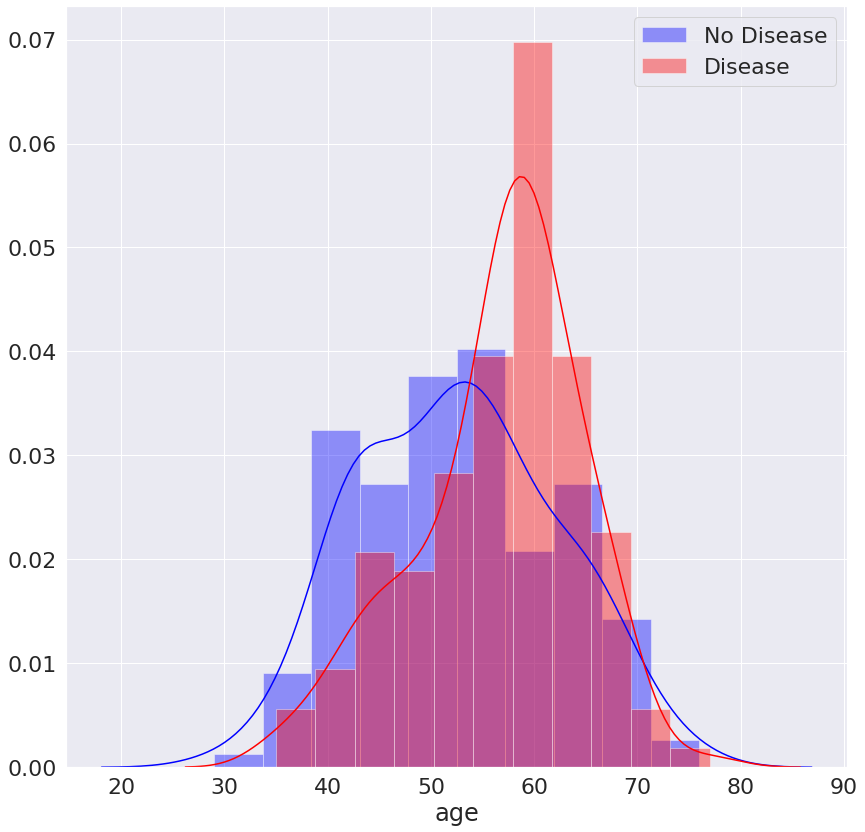

In [29]:
# plot the people who have heart disease vs not 
plt.figure(figsize=(14,14))
sns.distplot(df.age[df.num==0],label='No Disease',color='blue')
sns.distplot(df.age[df.num==1],label='Disease',color='Red')
plt.legend()
plt.show()

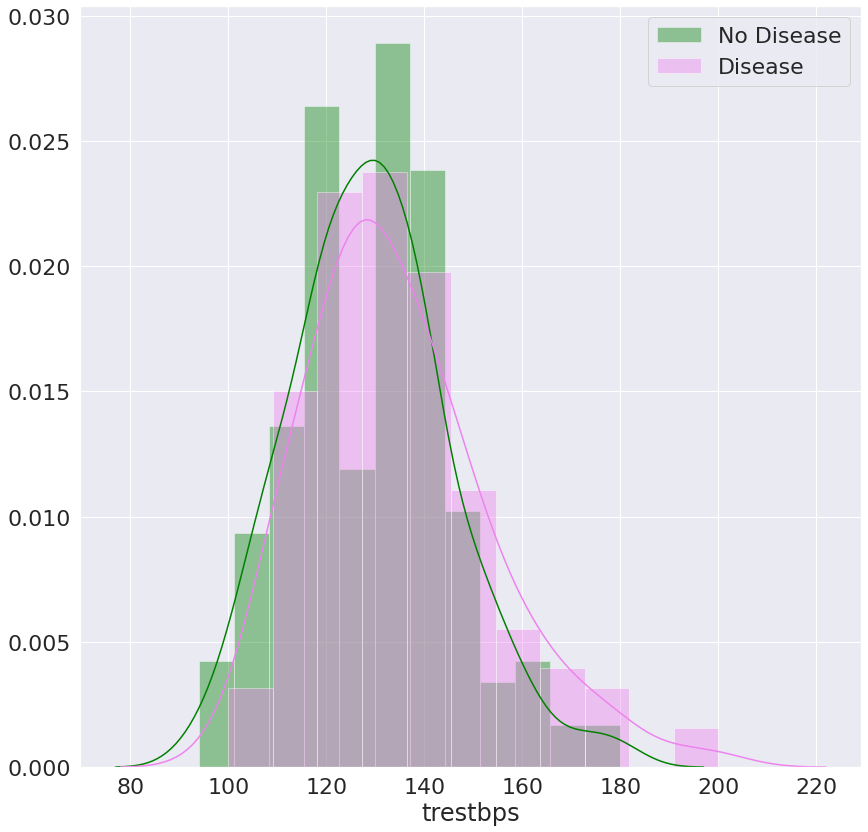

In [26]:
# plot the people who have heart disease vs not 
plt.figure(figsize=(14,14))
sns.distplot(df.trestbps[df.num==0],label='No Disease',color='Green')
sns.distplot(df.trestbps[df.num==1],label='Disease',color='violet')
plt.legend()
plt.show()

<Figure size 1008x1008 with 0 Axes>

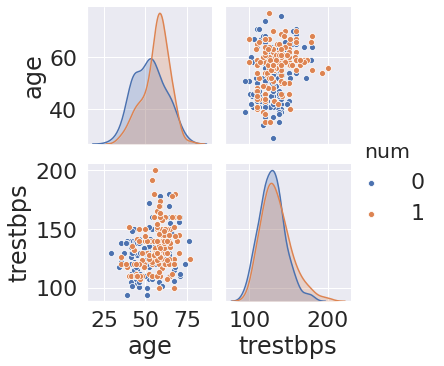

In [51]:
# show pair plot
plt.figure(figsize=(14,14))
sns.pairplot(df[['age','trestbps','num']],hue='num')
plt.show()

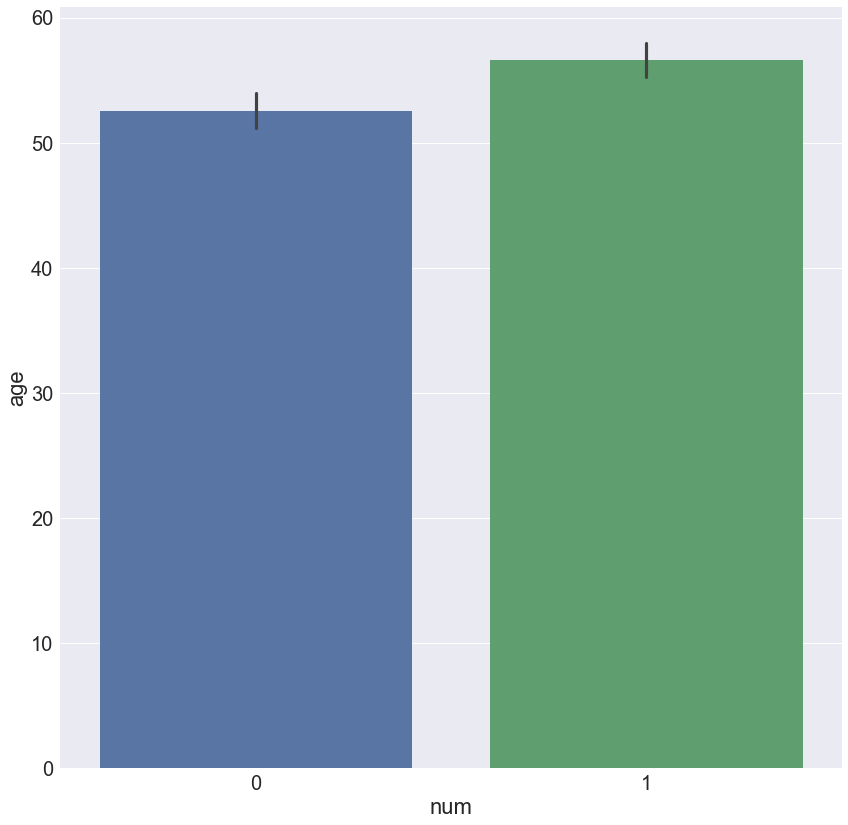

In [266]:
# average age of people with / out heart dieases
plt.figure(figsize=(14,14))
sns.barplot(x='num',y='age',data=df)
plt.show()

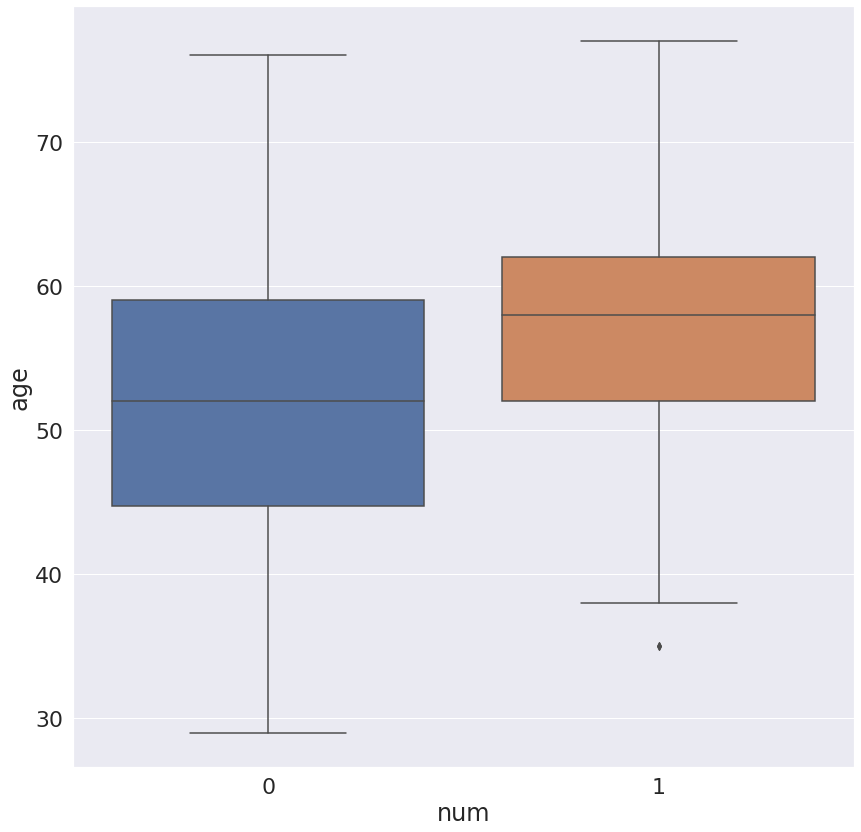

In [30]:
# box plot 
plt.figure(figsize=(14,14))
sns.boxplot(x="num", y='age', data=df)
plt.show()

In [53]:
# prepare color for other stuffs
import umap
from sklearn.manifold import TSNE
textd = [0 if cl==0 else 1 for cl in df['num']]
textd = np.array(textd)
digit_color=['rgba(236,223,1, 0.85)','rgba((1,223,102, 0.7))']
colors=[digit_color[d] for d in textd]
tooltips=list(map(str, textd))

In [54]:
%time dim_reduced = umap.UMAP(n_neighbors=15, n_components=3, min_dist=0.98, random_state=7654321).fit_transform(df.loc[:, df.columns != 'num'])
%time proj_3d = TSNE(n_components=3, perplexity=20, random_state=7654321).fit_transform(df.loc[:, df.columns != 'num'])

CPU times: user 4.51 s, sys: 423 ms, total: 4.94 s
Wall time: 4.22 s
CPU times: user 24 s, sys: 31.5 ms, total: 24 s
Wall time: 3.15 s


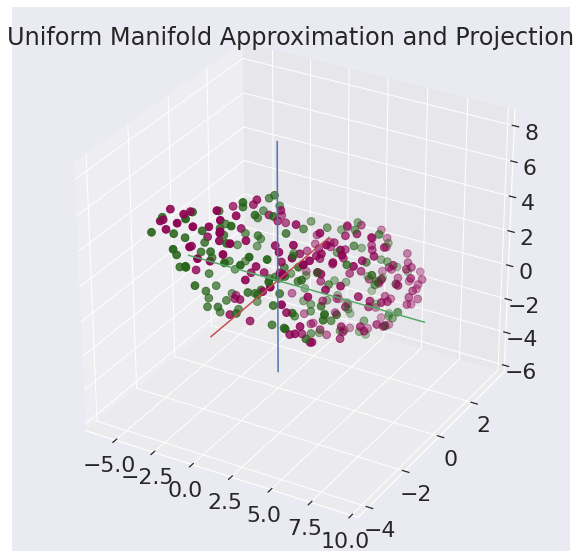

In [55]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dim_reduced[:,0], dim_reduced[:,1], dim_reduced[:,2],c=textd ,cmap=plt.cm.PiYG,s=60  )
# make simple, bare axis lines through space:
# Inpired: https://python-graph-gallery.com/372-3d-pca-result/
xAxisLine = ((min(dim_reduced[:,0])-np.mean(dim_reduced[:,0]), 
              max(dim_reduced[:,0])+np.mean(dim_reduced[:,0])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'g')

yAxisLine = ((0, 0),(min(dim_reduced[:,1])-np.mean(dim_reduced[:,1]), 
                     max(dim_reduced[:,1])+np.mean(dim_reduced[:,1])),  (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')

zAxisLine = ( (0, 0), (0,0),(min(dim_reduced[:,2])-np.mean(dim_reduced[:,2]),
                             max(dim_reduced[:,2])+np.mean(dim_reduced[:,2])),)
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'b')

plt.title('Uniform Manifold Approximation and Projection')
plt.show()

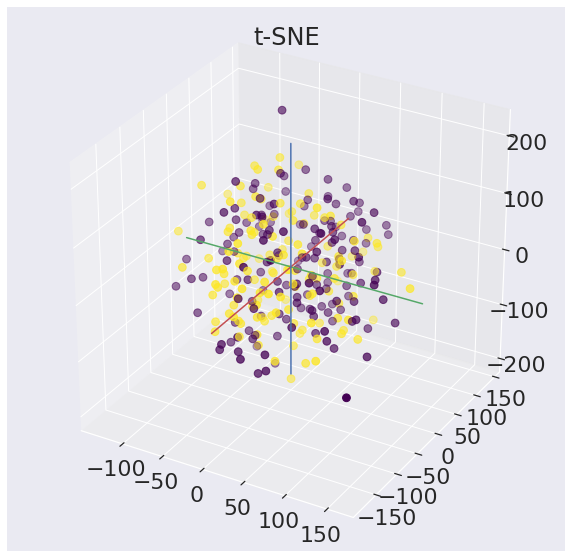

In [57]:
plt.close('all')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(proj_3d[:,0], proj_3d[:,1], proj_3d[:,2],c=textd ,cmap=plt.cm.viridis,s=60  )

# make simple, bare axis lines through space:
# Inpired: https://python-graph-gallery.com/372-3d-pca-result/
xAxisLine = ((min(proj_3d[:,0])-np.mean(proj_3d[:,0]), 
              max(proj_3d[:,0])+np.mean(proj_3d[:,0])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'g')

yAxisLine = ((0, 0),(min(proj_3d[:,1])-np.mean(proj_3d[:,1]), 
                     max(proj_3d[:,1])+np.mean(proj_3d[:,1])),  (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')

zAxisLine = ( (0, 0), (0,0),(min(proj_3d[:,2])-np.mean(proj_3d[:,2]),
                             max(proj_3d[:,2])+np.mean(proj_3d[:,2])),)
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'b')
plt.title('t-SNE')
plt.show()